# Predicting Health Insurance Price for an individual or family

The majority of the countries finalize health insurance costs based on many factors such as age, number of people in families, etc. What should be the actual health insurance price for an individual or a family is an issue for many companies. Hence, one insurance company hired you as a data scientist to predict the health insurance cost for possible future customers. They have already collected samples required to perform all data analysis and machine learning tasks. Your task is to perform all data analysis steps and finally create a machine learning model which can predict the health insurance cost.

In [244]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import plotly.express as px

In [245]:
import warnings
warnings.filterwarnings("ignore") # ignoring wranings

In [246]:
#reading the dataset

Health_raw = pd.read_excel("Health_insurance_cost (1).xlsx")
Health_data = Health_raw.copy() #creating a copy of raw dataset

### Exploratory Data Analysis

In [247]:
#reading the top 5 records
Health_data.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [248]:
#reading the last 5 records
Health_data.tail()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1333,50.0,male,30.97,3,no,northwest,10600.5483
1334,18.0,female,31.92,0,no,northeast,2205.9808
1335,18.0,female,36.85,0,no,southeast,1629.8335
1336,21.0,female,25.80,0,no,southwest,2007.9450
1337,61.0,female,29.07,0,yes,northwest,29141.3603


* **There are missing values in the form of NaN**
* **In our dataset age , gender , BMI , Children , smoking_status , location are Independent Variables.**
* **And , health_insurance_price is dependent Variable which is dependent on Independent Variables**
* **As , we can see that health_insurance_price is continous Dependent Variable , So this is Regression Problem**

In [249]:
#exploring the number of observations and variables
Health_data.shape

(1338, 7)

In [250]:
#getting ststistical summary of dataset
Health_data.describe(include = 'all')

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1310.000000,1338,1315.000000,1338.000000,1338,1338,1336.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.166412,NaN,30.638217,1.094918,NaN,NaN,13268.527719
std,14.055378,NaN,6.110302,1.205493,NaN,NaN,12112.797724
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.210000,0.000000,NaN,NaN,4744.325050
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16604.302645


* Data is looking good as Min and Max are possible values , there may be outliers but data does't contain impossible/incorrect values.
* Age have two unique values Male and Female
* smoking_status also have two unique values with YES or NO.
* In location , there are 4 locations

In [251]:
# checking the null values present and Datatypes of Features.

Health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


**Observations**
* we have 3 features with categorical data
* 4 features with numerical data
* health_insurance_price is the Target Variable
* we have 2 null values in Target Variable

In [252]:
#getting the sum of null values present in every feature

Health_data.isna().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [253]:
#checking for duplicates and dropping duplicates , if any

Health_data.drop_duplicates()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


* There are no duplicates in the dataset.

**Univariate Analysis**

In [254]:
fig = px.histogram(Health_data, x="age", nbins=50, width=800, height=400, # creating histogram for life expectancy with 20 bins
                  labels={"age": "Age Distribution"})
fig.show()

* People applying for Health Insurance is highest in number with age group 19-20 

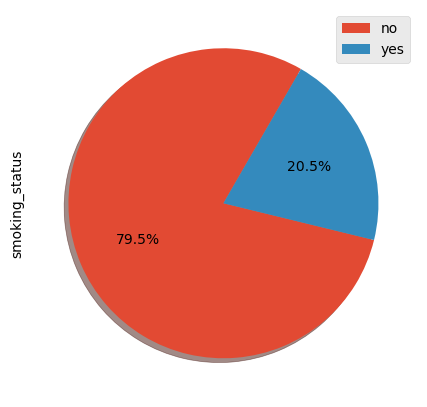

In [255]:
plt.style.use('ggplot')
plt.figure(figsize = [5,6])
Health_data['smoking_status'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
plt.legend()

* approx 80% customers are non-smokers who are applying for Health Insurance.
* Number of non-smokers applying for Health Insurance are maximum.

In [256]:
fig = px.histogram(Health_data, x="gender", width=500, height=400, # creating histogram for life expectancy with 20 bins
                  labels={"gender": "Gender Distribution"})
fig.show()

In [257]:
fig = px.histogram(Health_data, x="BMI" ,width=800, height=400, # creating histogram for life expectancy with 20 bins
                  labels={"BMI": "BMI of Customers"})
fig.show()

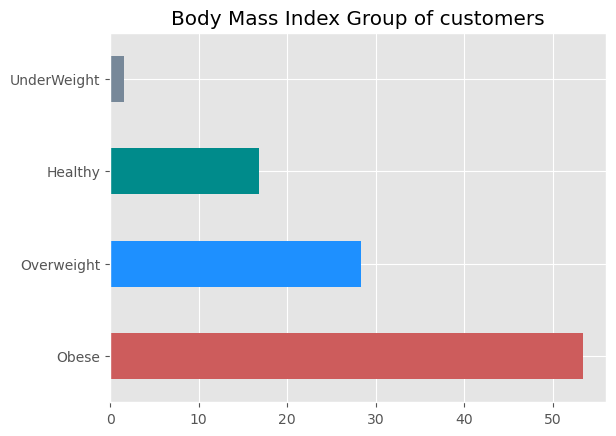

In [258]:
# binning 'BMI' and Creating new column "BMI_range"
Health_raw['BMI_range']= pd.cut(Health_raw['BMI'], [0,18.5,24.9,29.9,100],labels=['UnderWeight','Healthy','Overweight','Obese'])
(Health_raw['BMI_range'].value_counts(normalize=True)*100).plot.barh(title ="Body Mass Index Group of customers", color=['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen' ])
plt.xticks(rotation=0)
plt.show()

* Normal BMI Range = 18.5 - 24.9
* The Overweight and Obese Group are the largest group applying for Health Insurance.
* This can affect the Insurance Price the person get.

In [259]:
fig = px.histogram(Health_data, x="Children", width=800, height=400, # creating histogram for life expectancy with 20 bins
                  labels={"Children": "Number of Childrens"})
fig.show()

* Customers Applying for Health Insurance who have NO CHILDREN are maximum.

In [260]:
fig = px.histogram(Health_data, x="location", width=800, height=400, # creating histogram for life expectancy with 20 bins
                  labels={"location": "Location of Customers"})
fig.show()

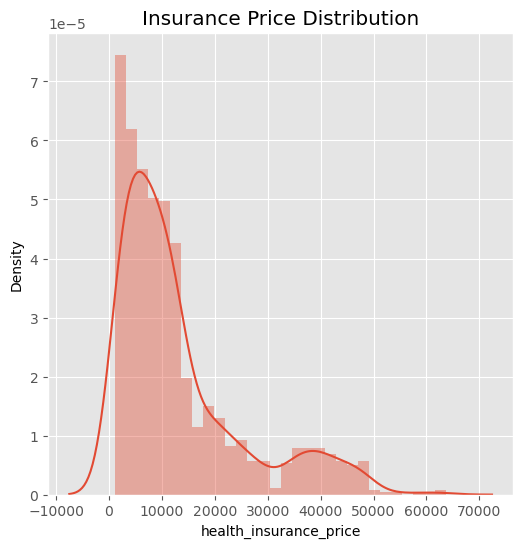

In [261]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(Health_data['health_insurance_price'])
plt.title('Insurance Price Distribution')
plt.show()

* we have a lot of data distributed between 10000 and we have very little values in 30,000 -40,000.

**Checking for Outliers**

In [262]:
fig = px.box(Health_data, y="age", width=400, height=300)
fig.show()

* Data is normally distributed. Min - 18 & Max - 64

In [263]:
fig = px.box(Health_data, y="BMI", width=400, height=300)
fig.show()

* There are outliers in BMI Data , But these are not incorrect data as these are possible so we will keep as it is.

In [264]:
fig = px.box(Health_data, y="health_insurance_price", width=400, height=300)
fig.show()

* There are outliers too , but again these are possible data.

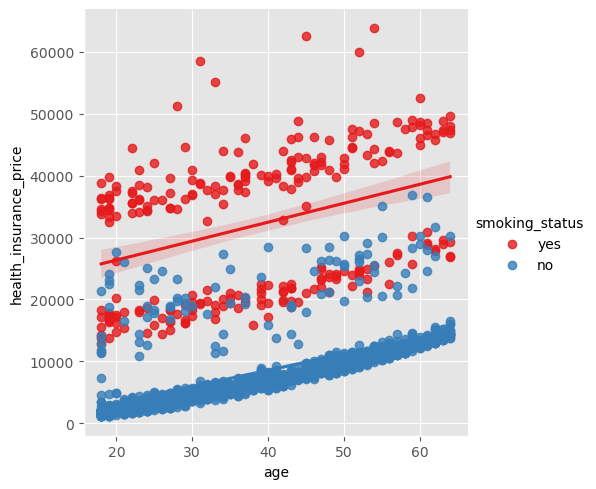

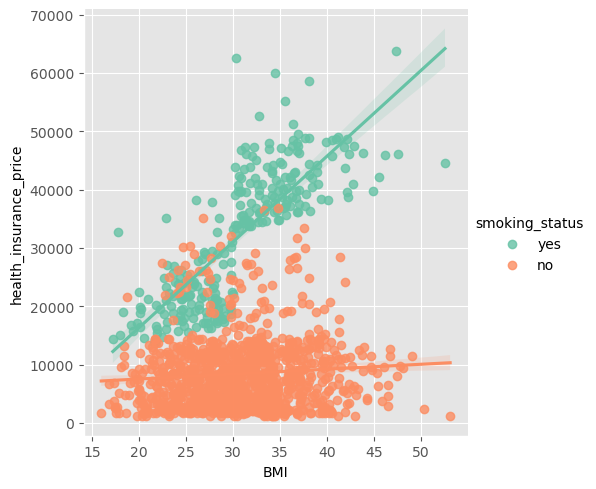

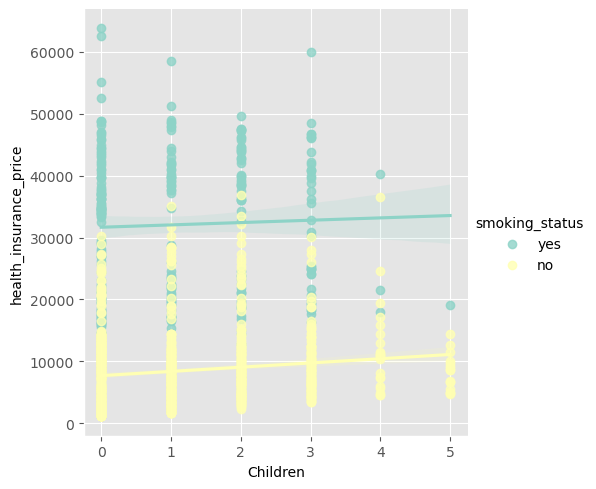

In [265]:
ax = sns.lmplot(x = 'age', y = 'health_insurance_price', data=Health_data, hue='smoking_status', palette='Set1')
ax = sns.lmplot(x = 'BMI', y = 'health_insurance_price', data=Health_data, hue='smoking_status', palette='Set2')
ax = sns.lmplot(x = 'Children', y = 'health_insurance_price', data=Health_data, hue='smoking_status', palette='Set3')

**As we can see , Smoking has serious effect on Health_insurance_price.**

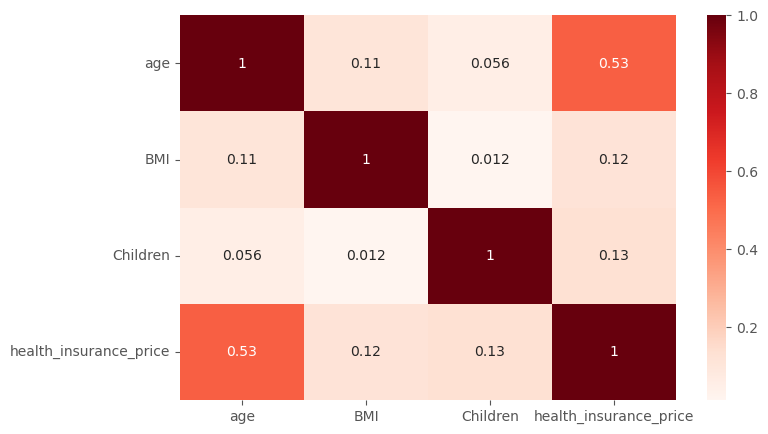

In [266]:
#First we will do a correlation matrix heatmap to see the correlation coefficient for each pair of features

corr_matrix = Health_data.corr(method='spearman').abs()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="Reds")
plt.show()

**We can see that Health Insurance Price are strong connected with age and if the person is smoker or not**

In [267]:
Health_data.groupby("smoking_status").agg({"health_insurance_price": "mean"})

,health_insurance_price
smoking_status,
no,8437.935287
yes,32077.757594


**Observations**
* We can see the changes in the amount of Health Insurance Price for Smokers and Non-smokers.
* There is a huge difference between both of the groups.

### Dealing with Null Values

We have null values in three features Age , BMI and health_insurance_price.

health_insurance_price is our Target Variable , so we can't impute null values.
We have to remove it.

In [268]:
#checking for any pattern in records where null values present in health_insurance_price

Health_data[Health_data['health_insurance_price'].isnull()]

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1281,47.0,female,27.645,2,yes,northwest,NaN
1312,34.0,male,42.900,1,no,southwest,NaN


In [269]:
#dropping both records

Health_data.dropna(subset=['health_insurance_price'], inplace=True)

In [270]:
Health_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1308 non-null   float64
 1   gender                  1336 non-null   object 
 2   BMI                     1313 non-null   float64
 3   Children                1336 non-null   int64  
 4   smoking_status          1336 non-null   object 
 5   location                1336 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.5+ KB


* we are now left with 1336 records.

In [271]:
Health_data.isna().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     0
dtype: int64

<Axes: >

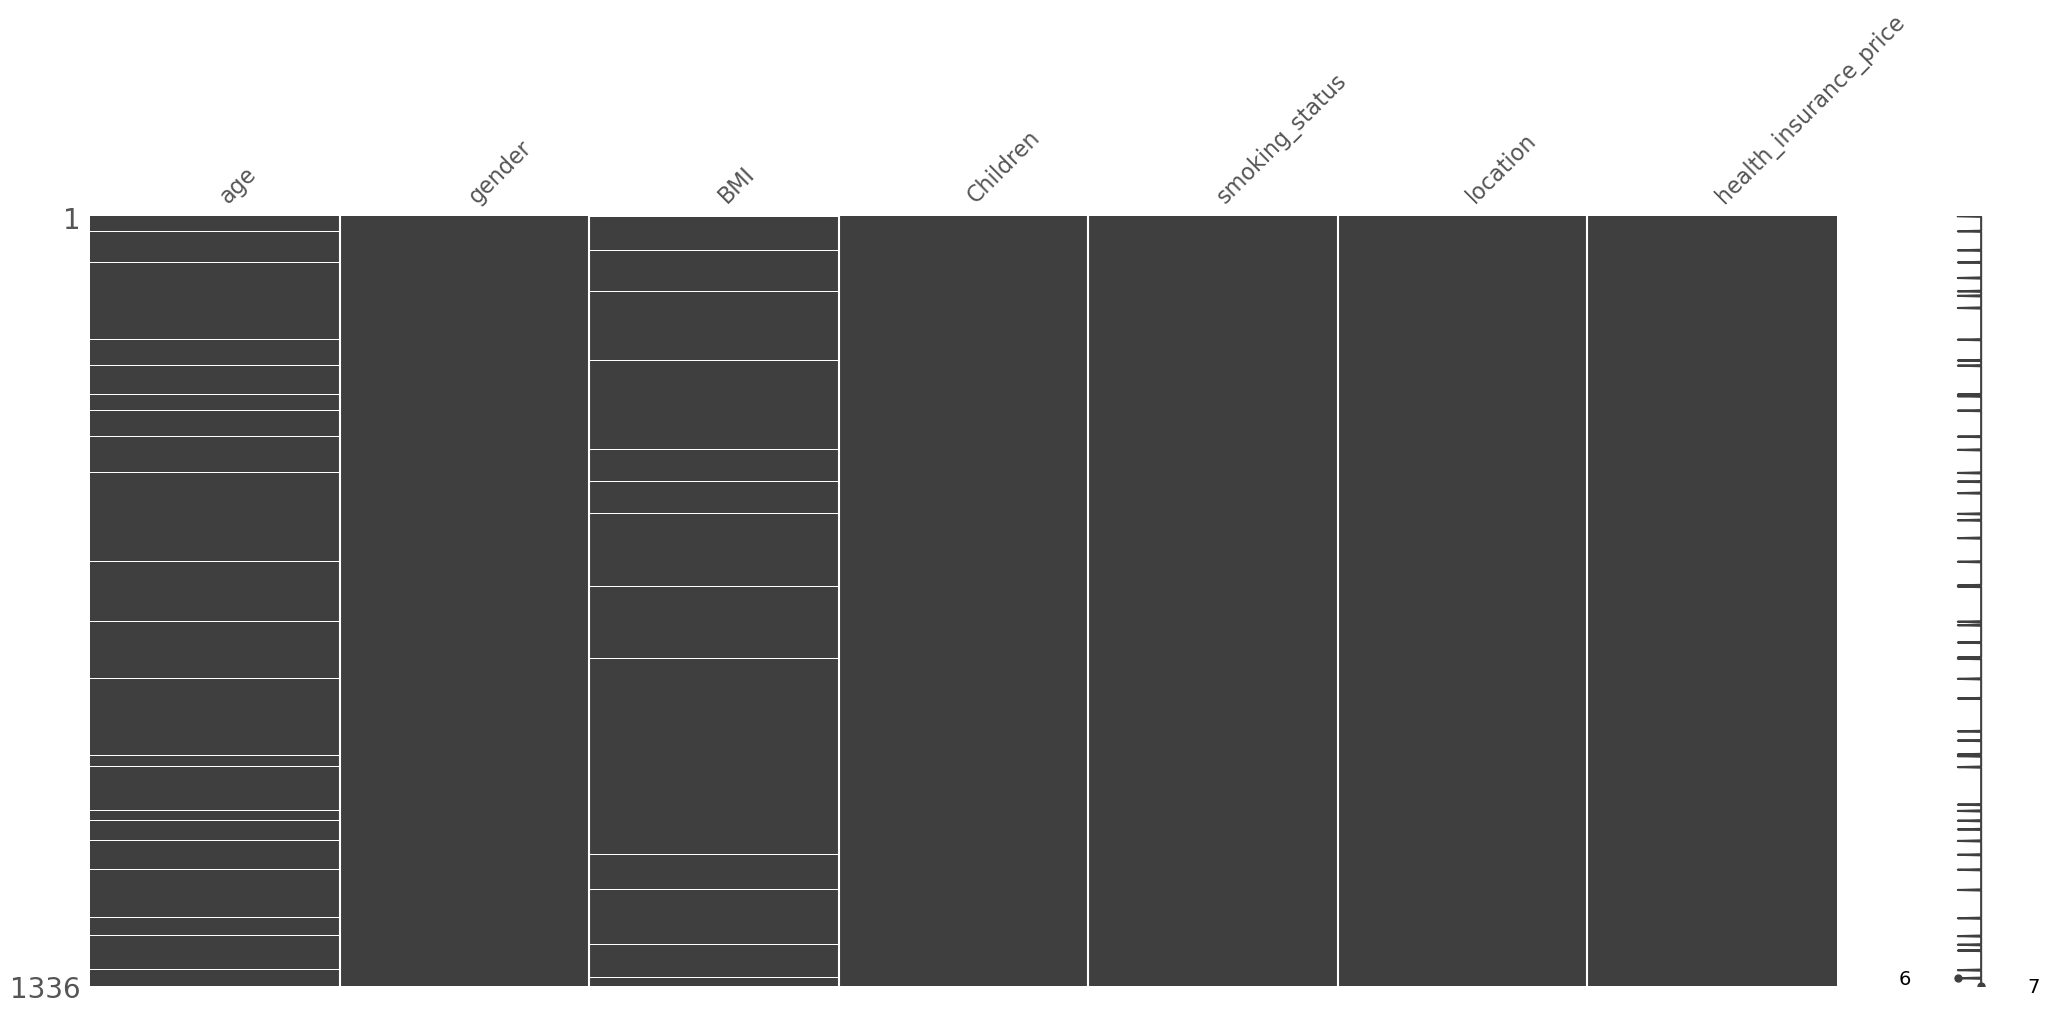

In [272]:
# visualization of missing values
import missingno as msno
msno.matrix(Health_data)

<Axes: >

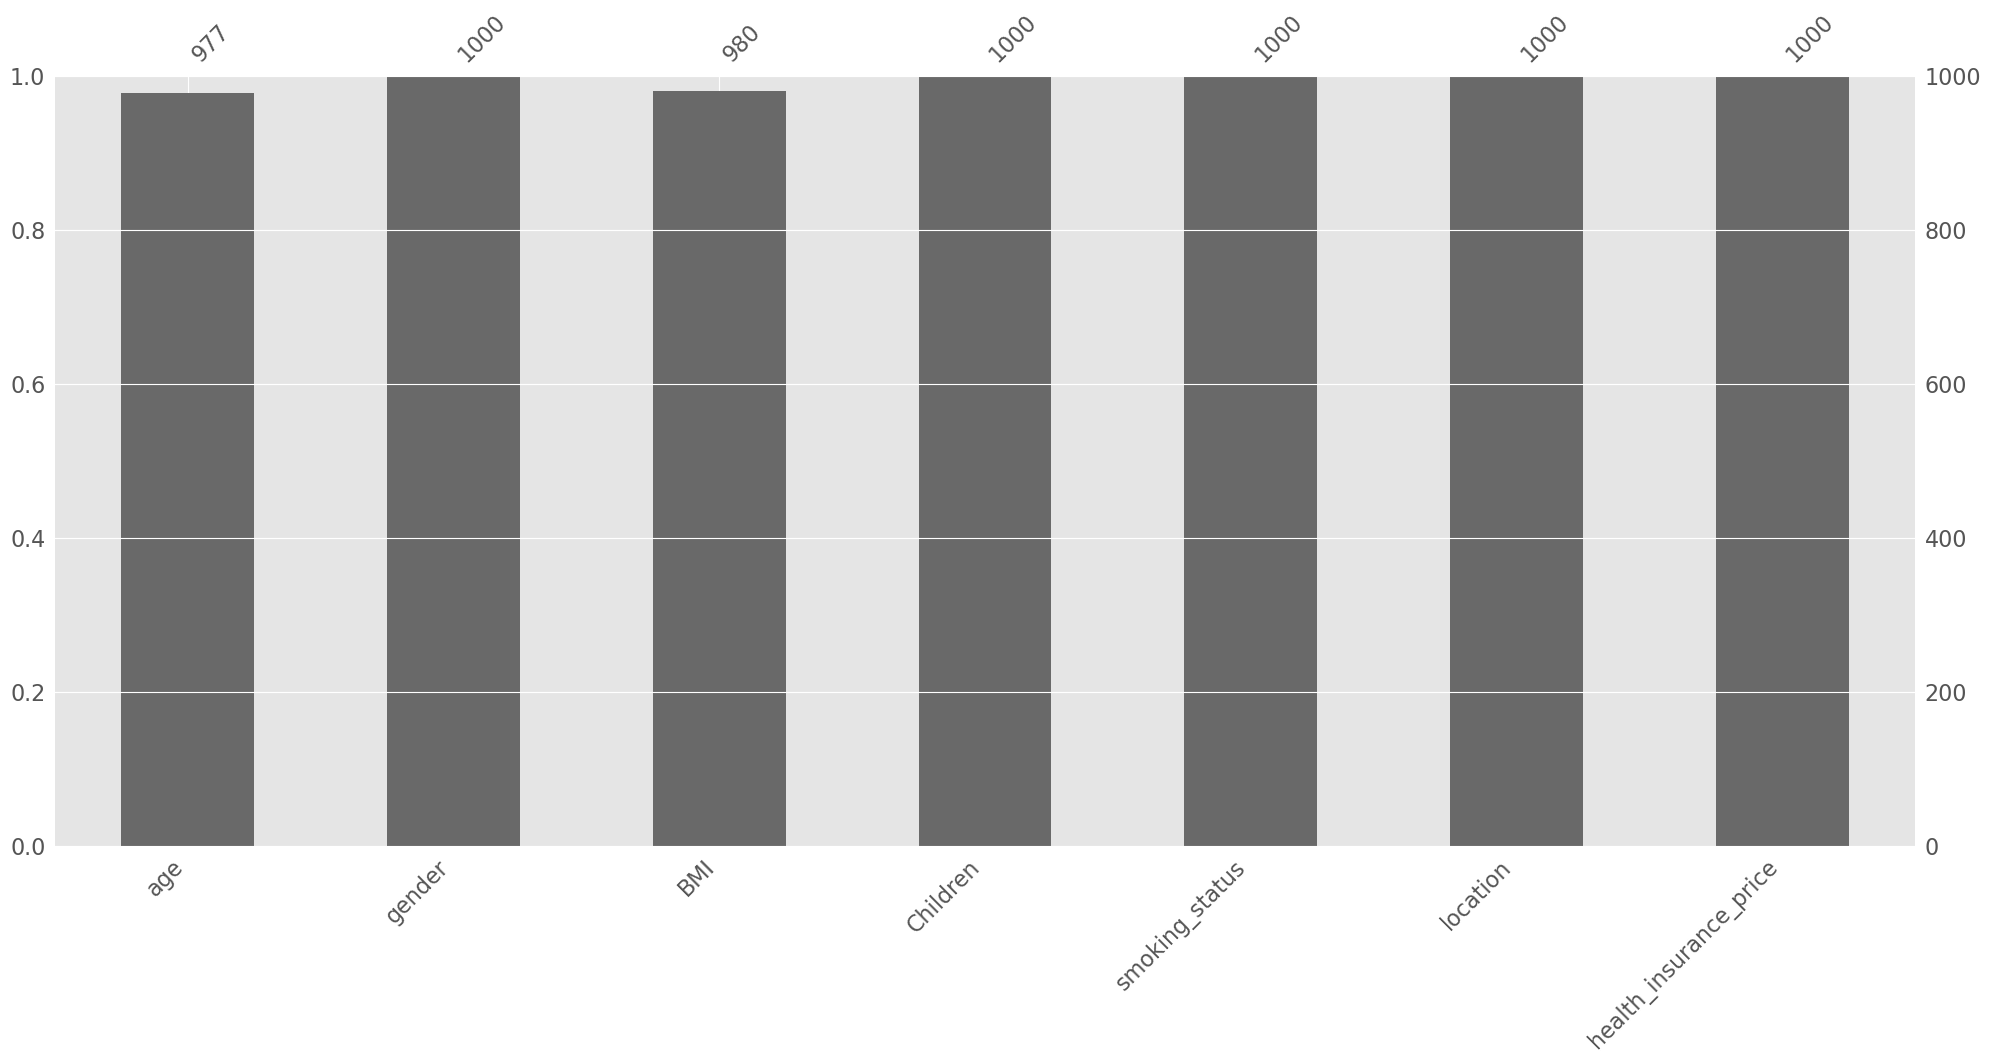

In [273]:
# msno.bar is a simple visualization of null values by column:

msno.bar(Health_data.sample(1000))

<Axes: >

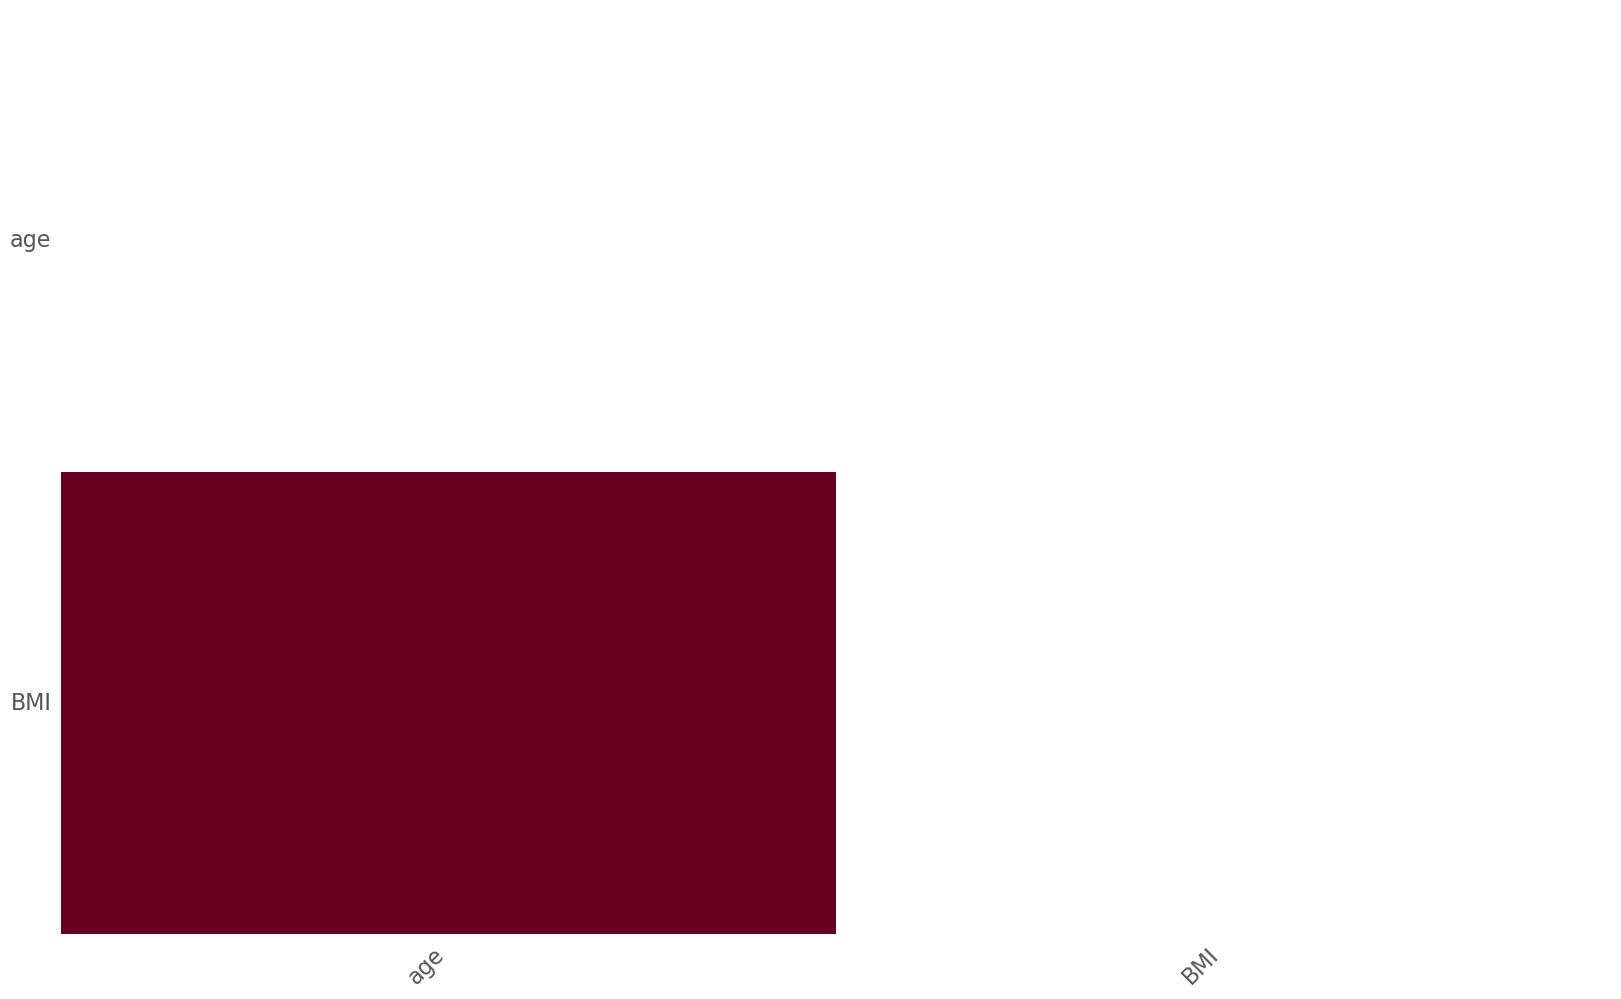

In [274]:
# To check the missing no. correlation heatmap measures nullity correlation.

msno.heatmap(Health_data)

### Converting Categorial Columns into numerical Columns

we have 3 features with String datatype , As ML Algoriths understand only numerical columns so we need to convert these features into numerical data.


In [275]:
#fetching uniques values of features
print(Health_data['gender'].unique())
print(Health_data['smoking_status'].unique())
print(Health_data['location'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [276]:
#Encoding Gender column
Health_data['gender'] = Health_data['gender'].map({'female' : 0 , 'male' : 1}) 
#Encoding Smoking_status Column
Health_data['smoking_status'] = Health_data['smoking_status'].map({'no' : 0 , 'yes' : 1}) 
#Encoding Location Column
Health_data['location'] = Health_data['location'].map({'southwest' : 1 , 'southeast' : 2 , 'northwest' : 3 , 'northeast' : 4})

In [277]:
Health_data.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,NaN,0,1,1,16884.92400
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,3,21984.47061
4,32.0,1,28.880,0,0,3,3866.85520


### Imputation of Null Values

**Mean Imputation**

In [278]:
from sklearn.impute import SimpleImputer # importing simple imputer
health_mean = Health_data.copy(deep=True) # creating a copy for further evaluation
mean_imputer = SimpleImputer(strategy='mean') # using mean to impute the value
health_mean.iloc[:, :] = mean_imputer.fit_transform(health_mean) #  both fit a model to the data and then transform the data using that model

**Median Imputation**

In [279]:
health_median = Health_data.copy(deep=True) # creating a copy for further evaluation
median_imputer = SimpleImputer(strategy='median') # using median to impute the value
health_median.iloc[:, :] = median_imputer.fit_transform(health_median)

**Mode Imputation**

In [280]:
health_mode = Health_data.copy(deep=True) # creating a copy for further evaluation
mode_imputer = SimpleImputer(strategy='most_frequent') # using most frequent to impute the value
health_mode.iloc[:, :] = mode_imputer.fit_transform(health_mode)

**KNN Imputation**

In [281]:
from fancyimpute import KNN # importing KNN library
knn_imputer = KNN() # calling KNN function
health_knn = Health_data.copy(deep=True) # creating copy
health_knn.iloc[:, :] = knn_imputer.fit_transform(health_knn)

Imputing row 1/1336 with 1 missing, elapsed time: 0.343
Imputing row 101/1336 with 0 missing, elapsed time: 0.344
Imputing row 201/1336 with 0 missing, elapsed time: 0.345
Imputing row 301/1336 with 0 missing, elapsed time: 0.345
Imputing row 401/1336 with 0 missing, elapsed time: 0.346
Imputing row 501/1336 with 0 missing, elapsed time: 0.347
Imputing row 601/1336 with 0 missing, elapsed time: 0.348
Imputing row 701/1336 with 0 missing, elapsed time: 0.348
Imputing row 801/1336 with 0 missing, elapsed time: 0.349
Imputing row 901/1336 with 0 missing, elapsed time: 0.349
Imputing row 1001/1336 with 0 missing, elapsed time: 0.350
Imputing row 1101/1336 with 0 missing, elapsed time: 0.351
Imputing row 1201/1336 with 0 missing, elapsed time: 0.351
Imputing row 1301/1336 with 0 missing, elapsed time: 0.352


**Visualising Imputation**

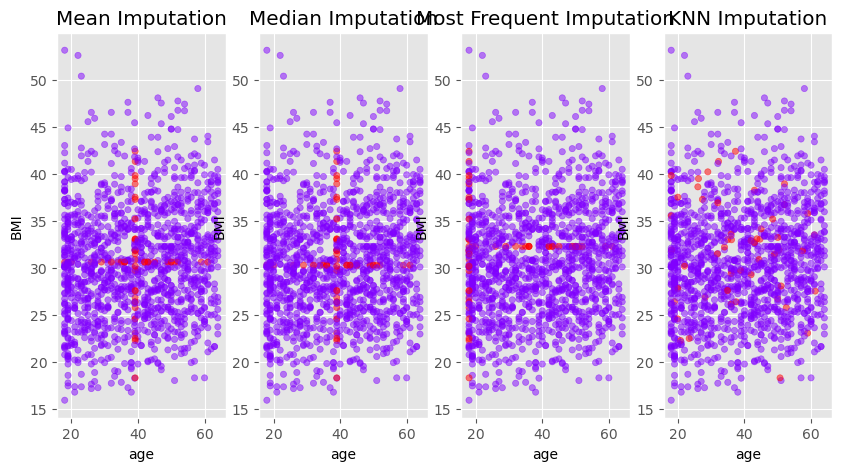

In [282]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5)) # creating 2 rows and 3 columns
nullity = Health_data['age'].isnull() + Health_data['BMI'].isnull() # creating null columns between culmen length and culmen depth
imputations = {'Mean Imputation': health_mean, # creating a python dictionary
               'Median Imputation': health_median,
               'Most Frequent Imputation': health_mode,
               'KNN Imputation': health_knn}

for ax, df_key in zip(axes.flatten(), imputations): # a for loop to iterate over the subplots and the imputed data
    imputations[df_key].plot(x='age', y='BMI', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

* we can see here that the distribution of data after KNN imputation have better distribution.
* So , we will use KNN imputation in our dataset.

In [283]:
Health_data = health_knn

In [284]:
Health_data.isna().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

In [285]:
print(Health_data['gender'].value_counts())
print(Health_data['Children'].value_counts())
print(Health_data['location'].value_counts())
print(Health_data['smoking_status'].value_counts())

1.0    675
0.0    661
Name: gender, dtype: int64
0.0    574
1.0    323
2.0    239
3.0    157
4.0     25
5.0     18
Name: Children, dtype: int64
2.0    364
1.0    324
3.0    324
4.0    324
Name: location, dtype: int64
0.0    1063
1.0     273
Name: smoking_status, dtype: int64


In [286]:
Health_data.describe()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1336.00000,1336.00000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.11990,0.50524,30.667334,1.094311,0.204341,2.485030,13268.527719
std,14.05076,0.50016,6.080906,1.206138,0.403370,1.104875,12112.797724
min,18.00000,0.00000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,26.00000,0.00000,26.308750,0.000000,0.000000,2.000000,4744.325050
50%,39.00000,1.00000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.00000,1.00000,34.585000,2.000000,0.000000,3.000000,16604.302645
max,64.00000,1.00000,53.130000,5.000000,1.000000,4.000000,63770.428010


**storing Independent variables and dependent variables separately**

In [287]:
#features Column
X = Health_data.drop(['health_insurance_price'] , axis = 1)

In [288]:
X

,age,gender,BMI,Children,smoking_status,location
0,19.0,0.0,26.426491,0.0,1.0,1.0
1,18.0,1.0,33.770000,1.0,0.0,2.0
2,28.0,1.0,33.000000,3.0,0.0,2.0
3,33.0,1.0,22.705000,0.0,0.0,3.0
4,32.0,1.0,28.880000,0.0,0.0,3.0
...,...,...,...,...,...,...
1333,50.0,1.0,30.970000,3.0,0.0,3.0
1334,18.0,0.0,31.920000,0.0,0.0,4.0
1335,18.0,0.0,36.850000,0.0,0.0,2.0
1336,21.0,0.0,25.800000,0.0,0.0,1.0


In [289]:
#Target/Response Variable
y = Health_data['health_insurance_price']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: health_insurance_price, Length: 1336, dtype: float64

**Observations**
* we cannot see any high correlation between any two features.
* So , we will not remove any feature


### Train/Test Split

* Splitting Dataset into two parts 
* Train the Model on Training Set
* Test the Model on Testing set

In [290]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 101) #keeping 20% data for testing , 80% for training.

In [291]:
print(X.shape, X_train.shape, X_test.shape)

(1336, 6) (1068, 6) (268, 6)


In [292]:
print(X_train)

           age  gender     BMI  Children  smoking_status  location
868  61.000000     1.0  23.655       0.0             0.0       4.0
284  52.000000     0.0  31.200       0.0             0.0       1.0
680  21.000000     0.0  17.400       1.0             0.0       1.0
367  42.000000     0.0  24.985       2.0             0.0       3.0
968  21.000000     1.0  25.745       2.0             0.0       4.0
..         ...     ...     ...       ...             ...       ...
575  58.000000     0.0  27.170       0.0             0.0       3.0
973  19.000000     0.0  40.500       0.0             0.0       1.0
75   57.000000     1.0  34.010       0.0             0.0       3.0
599  19.999397     0.0  37.525       2.0             0.0       3.0
863  36.000000     0.0  19.855       0.0             0.0       4.0

[1068 rows x 6 columns]


In [293]:
print(y_train)

868    13129.60345
284     9625.92000
680     2585.26900
367     8017.06115
968     3279.86855
          ...     
575    12222.89830
973     1759.33800
75     11356.66090
599    33471.97189
863     5458.04645
Name: health_insurance_price, Length: 1068, dtype: float64


**Feature Scaling**

In [294]:
from sklearn.preprocessing import StandardScaler # performing standardization technique
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[ 1.57272717,  1.00375236, -1.13066256, -0.90949401, -0.51226102,
         1.36845022],
       [ 0.92653654, -0.99626167,  0.11356769, -0.90949401, -0.51226102,
        -1.34978568],
       [-1.29923121, -0.99626167, -2.16216159, -0.08562666, -0.51226102,
        -1.34978568],
       ...,
       [ 1.28553133,  1.00375236,  0.57695894, -0.90949401, -0.51226102,
         0.46237159],
       [-1.37107346, -0.99626167,  1.15661027,  0.73824069, -0.51226102,
         0.46237159],
       [-0.22224682, -0.99626167, -1.75731265, -0.90949401, -0.51226102,
         1.36845022]])

In [295]:
X_test=sc.transform(X_test)
X_test

array([[-0.0786489 ,  1.00375236, -1.74164639, -0.08562666, -0.51226102,
         0.46237159],
       [ 0.99833549, -0.99626167, -0.39764686,  1.56210804, -0.51226102,
        -1.34978568],
       [ 1.07013445, -0.99626167,  0.2949664 , -0.08562666, -0.51226102,
         1.36845022],
       ...,
       [ 0.42394382, -0.99626167,  0.60092127, -0.90949401, -0.51226102,
        -1.34978568],
       [ 0.83209622, -0.99626167, -2.00797268, -0.90949401, -0.51226102,
         0.46237159],
       [-0.65304057, -0.99626167, -0.46361003, -0.90949401, -0.51226102,
        -1.34978568]])

## importing Models

In [296]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

**Model Training**

In [297]:
lr = LinearRegression()
lr.fit(X_train , y_train)
svm = SVR()
svm.fit(X_train , y_train)
rf = RandomForestRegressor()
rf.fit(X_train , y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train , y_train)

GradientBoostingRegressor()

**Prediction on Test Data**

In [298]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'actual' : y_test, 'Lr' : y_pred1,
                  'svm' : y_pred2 , 'rf' : y_pred3 , 'gr' : y_pred4})

In [299]:
df1

,actual,Lr,svm,rf,gr
1082,5855.90250,4469.513520,9235.095351,6122.512656,6362.167491
72,11741.72600,11459.218982,9285.879915,12989.927553,12974.114047
1110,11512.40500,13160.408377,9313.401427,13920.599975,13327.294074
670,4837.58230,7172.620574,9226.711096,5076.170622,6291.328567
579,3206.49135,2495.495512,9220.298495,7156.371373,5138.027625
...,...,...,...,...,...
28,2775.19215,-103.386702,9225.344603,9921.563130,6049.213791
930,2927.06470,10413.194507,9256.930827,3728.277747,4234.791593
933,7348.14200,10150.713238,9255.403925,12157.998767,7894.709707
1133,9991.03765,6705.303821,9285.234641,9472.010774,10288.004828


### Comparing Performance Visually

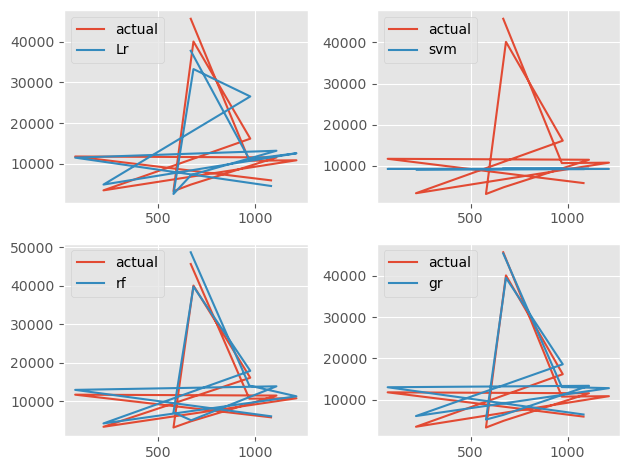

In [300]:
plt.subplot(221)
plt.plot(df1['actual'].iloc[0 : 11],label = 'actual')
plt.plot(df1['Lr'].iloc[0:11] , label = 'Lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['actual'].iloc[0 : 11],label = 'actual')
plt.plot(df1['svm'].iloc[0:11] , label = 'svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['actual'].iloc[0 : 11],label = 'actual')
plt.plot(df1['rf'].iloc[0:11] , label = 'rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['actual'].iloc[0 : 11],label = 'actual')
plt.plot(df1['gr'].iloc[0:11] , label = 'gr')

plt.tight_layout()
plt.legend()

**Evaluating the Algorithm**

we will evaluate our model using R2 , R2 is used to measure the goodness of fit , greater the value of R2 better the Regression model. Since we are having multiple linear regression problem , we can't use R2 value to evaluate accuracy of model , so we need to use adjusted R2 method.

In [301]:
#evaluating using metrics
from sklearn import metrics

In [302]:
r2m1 = metrics.r2_score(y_test , y_pred1)
r2m2 = metrics.r2_score(y_test , y_pred2)
r2m3 = metrics.r2_score(y_test , y_pred3)
r2m4 = metrics.r2_score(y_test , y_pred4)

In [303]:
print(r2m1,r2m2,r2m3,r2m4)

0.7734856668417132 -0.10413765640757444 0.8521752110969032 0.8635029028605524


**Since we are having multiple linear regression problem , we can't use R2 value to evaluate accuracy of model , so we need to use adjusted R2 method**

In [304]:
n= 1336   #number of observations
k=6  #number of independent variables
adj_r2_scorem1 = 1 - ((1-r2m1)*(n-1)/(n-k-1))
print(adj_r2_scorem1)

adj_r2_scorem2 = 1 - ((1-r2m2)*(n-1)/(n-k-1))
print(adj_r2_scorem2)

adj_r2_scorem3 = 1 - ((1-r2m3)*(n-1)/(n-k-1))
print(adj_r2_scorem3)

adj_r2_scorem4 = 1 - ((1-r2m4)*(n-1)/(n-k-1))
print(adj_r2_scorem4)

0.7724630287687637
-0.10912247652679596
0.8515078305600946
0.8628866631443473


**Observations :**

**we can see that Model 4 is performing better than any other Model , that is Gradient Boosting Algorithm**

In [305]:
#evaluating using Mean Absolute Error
s1 = metrics.mean_absolute_error(y_test , y_pred1)
s2 = metrics.mean_absolute_error(y_test , y_pred2)
s3 = metrics.mean_absolute_error(y_test , y_pred3)
s4 = metrics.mean_absolute_error(y_test , y_pred4)

In [306]:
print(s1,s2,s3,s4)

4224.41947937589 8511.721076138048 2734.5362008812267 2582.22558129945


**Observations :**
    
**Mean Absolute error is also used to measure the accuracy of Model**
* Here , the lower is better.
* we can see here also Model 4(Gradient Boosting Regression Model) is performing better among all Models .

**Mean of residuals**

It should be close to zero

In [307]:
residuals = y_test.values-y_pred1
mean_residuals = np.mean(residuals)
print("Mean of Residuals LR {}".format(mean_residuals))

residuals = y_test.values-y_pred2
mean_residuals = np.mean(residuals)
print("Mean of Residuals SVM {}".format(mean_residuals))

residuals = y_test.values-y_pred3
mean_residuals = np.mean(residuals)
print("Mean of Residuals RF {}".format(mean_residuals))

residuals = y_test.values-y_pred4
mean_residuals = np.mean(residuals)
print("Mean of Residuals GR {}".format(mean_residuals))

Mean of Residuals LR 308.29170455054384
Mean of Residuals SVM 4126.528428731813
Mean of Residuals RF -289.56431113421064
Mean of Residuals GR -3.3307368099824033


**Homoscedasticity**

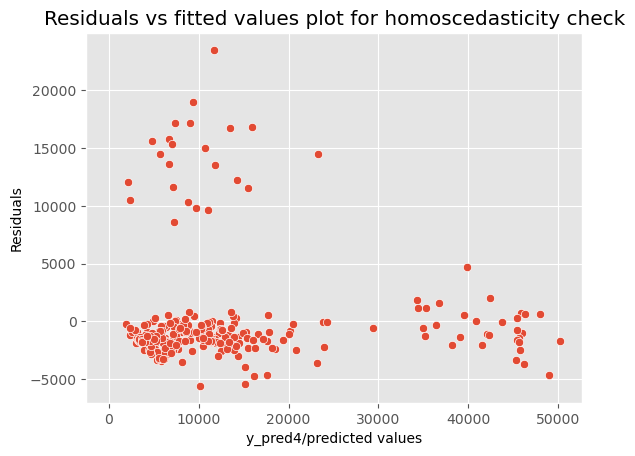

In [308]:
p = sns.scatterplot(x=y_pred4, y=residuals)
plt.xlabel('y_pred4/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot(x=[0,2.6],y=[0,0],color='Blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

<Axes: xlabel='health_insurance_price', ylabel='Density'>

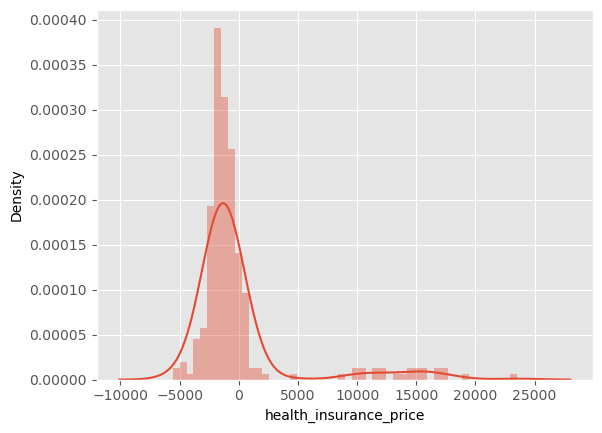

In [309]:
#Errors should be normally distributed
sns.distplot((y_test-y_pred4),bins=50)

**conclusion :**
* Gradient Boosting Algorithm is giving best results.
* So , we will use Gradient Boosting Algorithm for Model Deployment.

### Predicting house_insurance_price for new customer

In [310]:
# Predictions from our Model
# Let's grab predictions off our test set and see how well it did!


predictions = gr.predict(X_test)


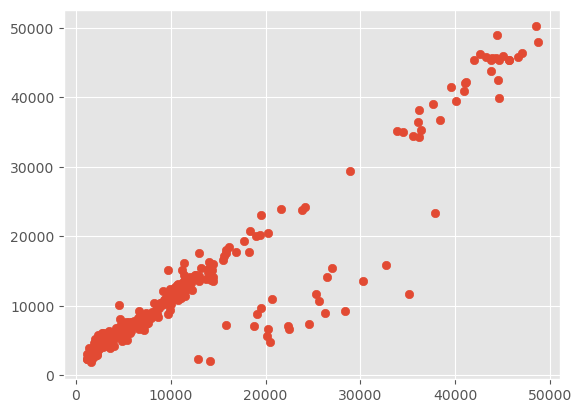

In [311]:
plt.scatter(y_test,predictions)

In [312]:
data = {'age' : 18.0,
        'gender' : 0 ,
        'BMI' : 31.92 ,
        'Children' : 0 ,
        'smoking_status' : 0,
        'location' : 4 }

df = pd.DataFrame(data , index = [0])
df

,age,gender,BMI,Children,smoking_status,location
0,18.0,0,31.92,0,0,4


In [313]:
new_pred = gr.predict(df)
print(new_pred)

[20781.49107614]


**1- Why is this proposal important in today’s world? How predicting a health insurance cost accurately can affect the health care/insurance field?**


Health insurance policy is an assurance which provides immediate financial help in case when any medical emergency arises. It is a contract between a policyholder and the insurance company which covers medical expenses that might occur due to illness, injury or accident. If you have a health insurance policy, then some or all the medical expenses will be borne by the insurance company, against which an insured is supposed to pay a certain amount known as premium.

Healthcare expenses are increasing at a rate higher than medical inflation, and that is why it is must for everyone to have a health insurance cover which not only helps you to save your emergency funds and saving of lifetime, in case any medical emergency occurs to you or your near and dear ones, but also supports you to deal with rising medical costs. 

Experts believe that a health insurance policy must be a part of your financial planning and it should be purchased early when you are young and responsible to stay safe and secured. Investing in a health insurance plan at an early age also provides other numerous advantages such as better sum insurance coverage, lower premium rates, no medical tests and so on.

Most of the health insurance providers have their own set parameters and based on them they fix the health insurance price. After conducting the research, compiling the historical data and analyzing your customer profile they decide to accept or reject your health insurance application. After assessing the risk factors, the health insurer will send the final quotation. It is important to know that every insurer uses its own assumptions and has its own set of standards while calculating the health insurance premium. 

It is very challenging for companies to decide the premium cost and also to accept or reject the application.
As , there can be many applicants who can have pre-existing diseases , and if they fail to recognise this and have given insurance to them at low cost then there will be a huge loss for them.
So, its very important to predict the premium cost as per the type and health status of applicants.
Like , applicants who are smokers , are more likely to have health issues in future , so the premium cost to them must be higher. Premium cost also depends on Age.

**2- If any, what is the gap in the knowledge, or how your proposed method can be helpful if required in the future for any other type of insurance?**

For Insurance companies it is very difficult task to predict the Insurance Amount.
This applies for insurance in every sector. for example : Bike insurance , car insurance , house insurance , death insurance etc.
In every sector the problem is same , it is very challenging for companies to finalise the premium cost.
It's must be not much higher as when it will be much higher , applicant will not take the policy , it will also be a loss for company.
And if , there are pre-existing issues and insurance have been provided by company at lower amount , then it will claim and in this case also there is a loss for company.

Working on this project I have found some parameters on which health insurance price depends , and aable to build a predictor to predict the amount.
with this knowledge I can build cost predictor for some other sectors also like automobile , life etc.


**3-  Please aim to identify patterns in the data and important features that may impact an ML model.**

As per my analysis , 
* The smoking status of applicant , have a huge impact on the health_insurance_price
* Age is also a important factor , as the age increases the health_insurance_price also increases.
